# San Francisco Incident Visualisations

# Primary Finding

Hourly trend of incidents is caused by larcency/theft catogory incidents, which are also the majority of the incidents. Steps of the analysis is given below.

Loading required libraries

In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dateutil

# load and explore data

In [333]:
sfc=pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [334]:
sfc.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [335]:
sfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


In [336]:
sfc['PdDistrict'].value_counts(dropna=False)

SOUTHERN      5739
MISSION       3700
NORTHERN      3589
CENTRAL       3513
BAYVIEW       2725
INGLESIDE     2378
TENDERLOIN    2257
TARAVAL       1853
PARK          1693
RICHMOND      1546
Name: PdDistrict, dtype: int64

In [337]:
sfc['Resolution'].value_counts(dropna=False)

NONE                                      19139
ARREST, BOOKED                             6502
ARREST, CITED                              1419
LOCATED                                    1042
UNFOUNDED                                   260
JUVENILE BOOKED                             163
PSYCHOPATHIC CASE                           114
JUVENILE CITED                               91
COMPLAINANT REFUSES TO PROSECUTE             66
EXCEPTIONAL CLEARANCE                        56
PROSECUTED BY OUTSIDE AGENCY                 40
DISTRICT ATTORNEY REFUSES TO PROSECUTE       33
NOT PROSECUTED                               28
JUVENILE ADMONISHED                          24
CLEARED-CONTACT JUVENILE FOR MORE INFO        8
JUVENILE DIVERTED                             8
Name: Resolution, dtype: int64

In [338]:
sfc['Descript'].value_counts(dropna=False)
sfc['Category'].value_counts(dropna=False)

LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZZLEMENT                     10
STOLEN PROPERTY             

# new attributes for analysis
after reviewing categorical atteibutes I have decided to add hour of day value, week of day values and 
to further group category attribute for better visualisation I have added group attribute with assigning the "Other" value 
to the categories with small percentages.

In [339]:
sfc['DateTime']=sfc['Date'].map(str)+' '+sfc['Time'].map(str)
sfc['DateTime'] = sfc['DateTime'].apply(dateutil.parser.parse)
sfc['DayofWeek'] = sfc['DateTime'].dt.dayofweek
sfc['WeekoYear'] = sfc['DateTime'].dt.weekofyear
sfc['Hour'] = sfc['DateTime'].dt.hour

In [340]:
sfc_cat={'Group':['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','LARCENY/THEFT','WARRANTS','DRUG/NARCOTIC','SUSPICIOUS OCC','MISSING PERSON','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other'
],'Category':['LARCENY/THEFT','OTHER OFFENSES','NON-CRIMINAL','ASSAULT','VEHICLE THEFT','WARRANTS','DRUG/NARCOTIC','SUSPICIOUS OCC','MISSING PERSON','SECONDARY CODES','WEAPON LAWS','ROBBERY','TRESPASS','FRAUD','DRUNKENNESS','KIDNAPPING','PROSTITUTION','DRIVING UNDER THE INFLUENCE','ARSON','RUNAWAY','LIQUOR LAWS','DISORDERLY CONDUCT','FORGERY/COUNTERFEITING','VANDALISM','SUICIDE','FAMILY OFFENSES','EMBEZZLEMENT','STOLEN PROPERTY','EXTORTION','BURGLARY','LOITERING','PORNOGRAPHY/OBSCENE MAT','GAMBLING','BRIBERY'
]}
CatGrp = pd.DataFrame(sfc_cat)
sfc=sfc.merge(CatGrp,on='Category',how='inner')

# visualisations

first I have focused on number of incident patterns by day of week and hour.

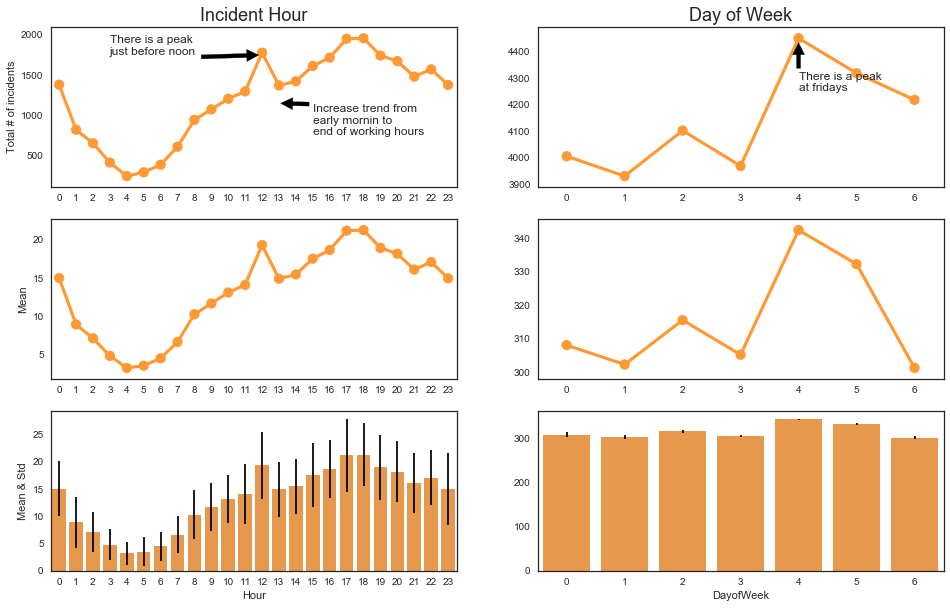

In [341]:
sns.set_style('white')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,10))

hour_value = sfc.groupby(by=['Hour','Date'], as_index=False)['IncidntNum'].count()
hour_mean_std = hour_value.groupby(by=['Hour'], as_index=False)['IncidntNum'].mean()
hour_std=hour_value.groupby(by=['Hour'], as_index=False)['IncidntNum'].std()
hour_mean_std['std']=hour_std['IncidntNum']
hour_value = sfc.groupby(by=['Hour'], as_index=False)['IncidntNum'].count()

############################################
plt.subplot(321)
sns.pointplot(x="Hour",  y="IncidntNum", data=hour_value, color="#ff9933")
#sns.distplot(sfc['Hour'], color='r', ax=axes[0])
plt.title('Incident Hour', fontsize=18)
plt.ylabel('Total # of incidents')
plt.xlabel('')
plt.annotate('Increase trend from \nearly mornin to \nend of working hours', xy=(13, 1150), xytext=(15, 750),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('There is a peak \njust before noon', xy=(12, 1750), xytext=(3, 1750),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
###########################################
plt.subplot(322)

day_value = sfc.groupby(by=['DayofWeek','WeekoYear'], as_index=False)['IncidntNum'].count()
day_mean_std = day_value.groupby(by=['DayofWeek'], as_index=False)['IncidntNum'].mean()
day_std=day_value.groupby(by=['DayofWeek'], as_index=False)['IncidntNum'].std()
day_mean_std['std']=hour_std['IncidntNum']
day_value = sfc.groupby(by=['DayofWeek'], as_index=False)['IncidntNum'].count()

sns.pointplot(x="DayofWeek",  y="IncidntNum", data=day_value, color="#ff9933")
#sns.distplot(sfc['DayofWeek'], color='r', ax=axes[1])
plt.title('Day of Week', fontsize=18)
plt.ylabel('')
plt.xlabel('')
plt.annotate('There is a peak \nat fridays', xy=(4, 4440), xytext=(4, 4250),
            arrowprops=dict(facecolor='black', shrink=0.05),)

############################################
plt.subplot(323)
sns.pointplot(x="Hour",  y="IncidntNum", data=hour_mean_std, color="#ff9933")
plt.ylabel('Mean')
plt.xlabel('')

############################################
plt.subplot(324)
sns.pointplot(x="DayofWeek",  y="IncidntNum", data=day_mean, color="#ff9933")
plt.ylabel('')
plt.xlabel('')

############################################
yerr= hour_mean_std['std']

plt.subplot(325)
sns.barplot(x="Hour",  y="IncidntNum",yerr=yerr, data=hour_mean_std, color="#ff9933")
plt.ylabel('Mean & Std')
#sns.distplot(sfc['Hour'], color='r', ax=axes[0])

############################################
yerr= day_mean_std['std']
plt.subplot(326)
sns.barplot(x="DayofWeek",  y="IncidntNum", yerr=yerr, data=day_mean_std, color="#ff9933")
plt.ylabel('')

plt.show()

there is a trend by hour of incident and number of incidents, which has the minimum numbers in early morning and increases to its max by the end of working hours, I've decided to further investigate reasons of this trend by chekcing hour trends by day of week, category and district values.

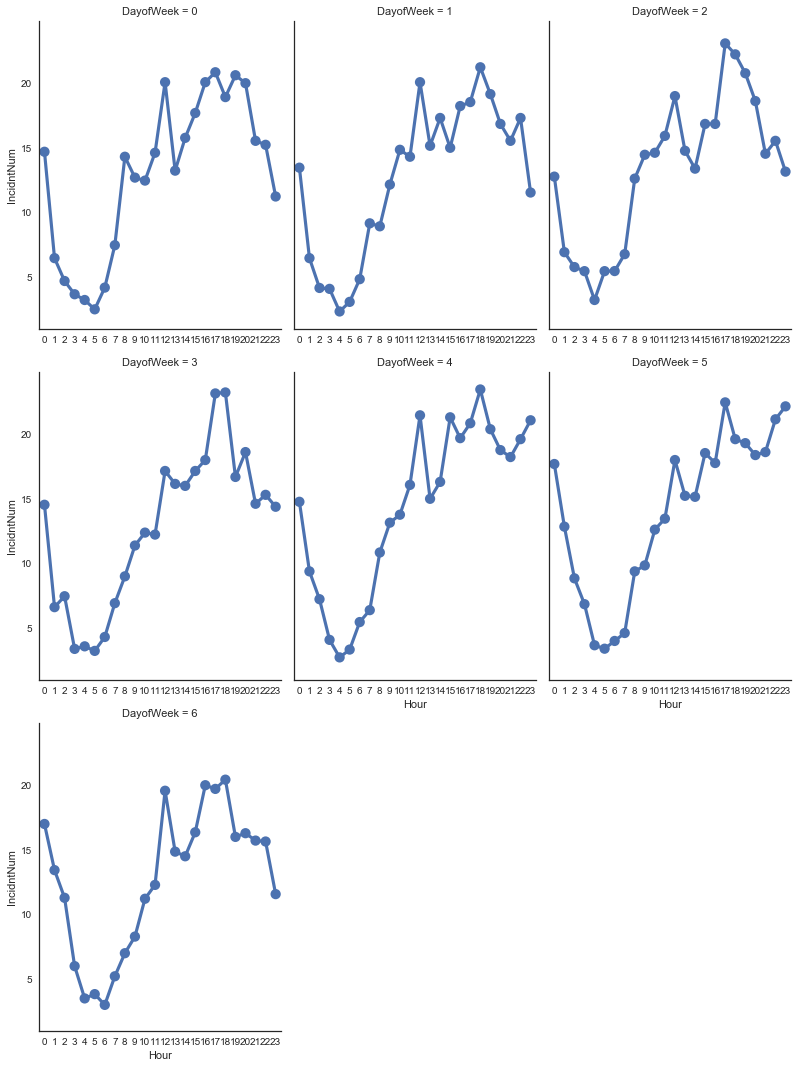

In [342]:
plot_data = sfc.groupby(by=['Hour','DayofWeek','Date'], as_index=False)['IncidntNum'].count()
plot_data = plot_data.groupby(by=['Hour','DayofWeek'], as_index=False)['IncidntNum'].mean()
with sns.plotting_context("notebook",font_scale=1):
    g = sns.factorplot(x="Hour", y="IncidntNum", #hue="DayofWeek",
                   col="DayofWeek", data=plot_data, kind="point", size=5, aspect=.75, sharex=False, col_wrap=3 #,palette="YlOrRd"
                      );
    
plt.show()

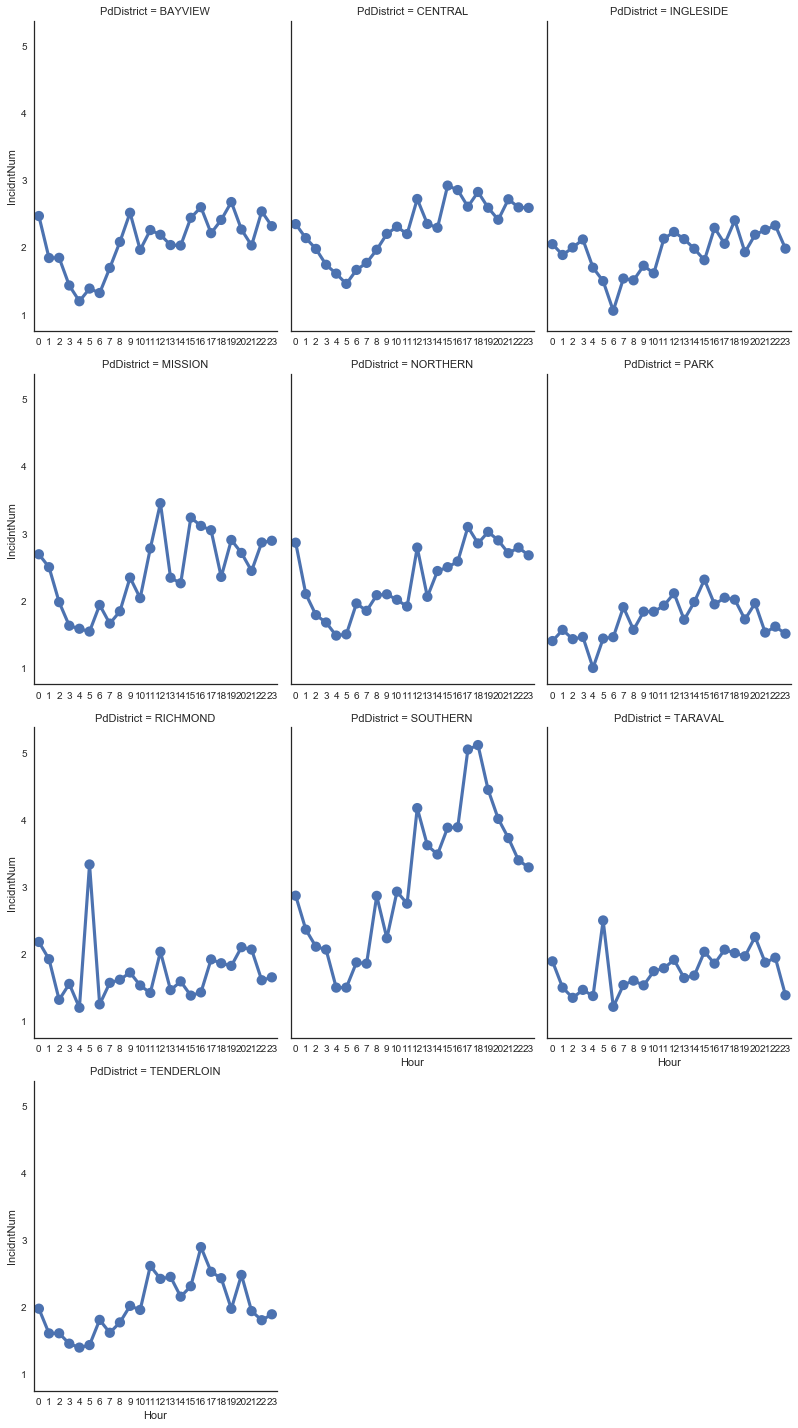

In [343]:
plot_data = sfc.groupby(by=['Hour','PdDistrict','Date'], as_index=False)['IncidntNum'].count()
plot_data = plot_data.groupby(by=['Hour','PdDistrict'], as_index=False)['IncidntNum'].mean()
with sns.plotting_context("notebook",font_scale=1):
    g = sns.factorplot(x="Hour", y="IncidntNum", #hue="DayofWeek",
                   col="PdDistrict", data=plot_data, kind="point", size=5, aspect=.75, sharex=False, col_wrap=3 #,palette="YlOrRd"
                      );
    
plt.show()

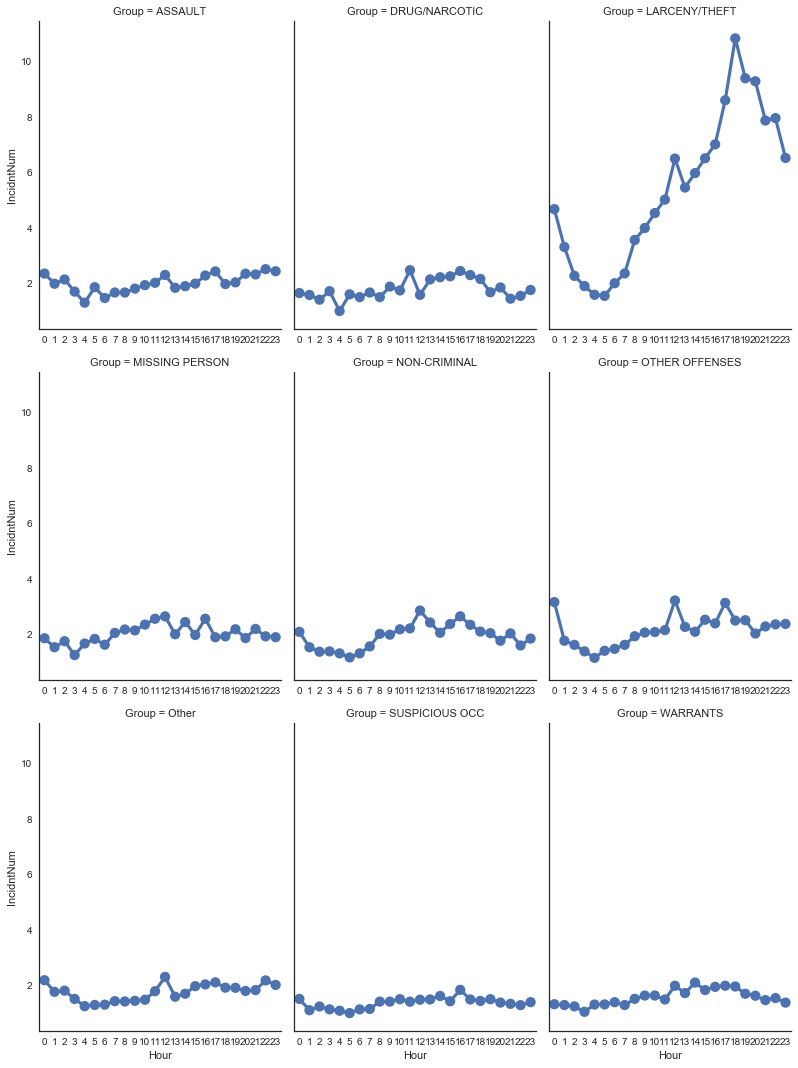

In [344]:
plot_data = sfc.groupby(by=['Hour','Group','Date'], as_index=False)['IncidntNum'].count()
plot_data = plot_data.groupby(by=['Hour','Group'], as_index=False)['IncidntNum'].mean()
with sns.plotting_context("notebook",font_scale=1):
    g = sns.factorplot(x="Hour", y="IncidntNum", #hue="DayofWeek",
                   col="Group", data=plot_data, kind="point", size=5, aspect=.75, sharex=False, col_wrap=3 #,palette="YlOrRd"
                      );
    
plt.show()

when reviewed the plots Larcency/theft groups trend was very similiar to general hour trend and other groups had more parallrl lines to X axis. from district point of view Sothern district had a similiar pattern and slightly different then other districts. but on the day ow week graphs there was no differentiation between days. so we can claim that trend in incident numbers by hour is mainly caused by the incidents in Larcency/theft category. 